In [1]:
# Dependencies

import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import numpy as np
import pandas as pd

In [2]:
# Import the required files

path = os.path.join('Resources', 'city_data.csv')
city_data = pd.read_csv(path)
city_data.head()

path2 = os.path.join('Resources', 'ride_data.csv')
ride_data = pd.read_csv(path2)
ride_data.head()


,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [3]:
city_data.head()
city_data.count()

city            126
driver_count    126
type            126
dtype: int64

In [4]:
#By City Plots (Bubble Plots)
#Average Fare per City 

bycityavg = ride_data.groupby("city").mean()
bycityavg.head()
bycityavgrev = bycityavg.reset_index()
bycityavgrev = bycityavgrev.rename(columns={"fare":"Average Fare"})
bycityavgrev = bycityavgrev[["city", "Average Fare"]]
bycityavgrev.head()

,city,Average Fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [5]:
#Total Counts of Ride per City

bycitytotal = ride_data.groupby("city").count()
bycitytotal = bycitytotal[["date"]]
bycitytotal = bycitytotal.rename(columns={"date":"Total Rides"})
bycitytotalrev = bycitytotal.reset_index()

bycitytotalrev.head()

,city,Total Rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [6]:
#Merge the required data frames

mergedata_df = city_data.merge(bycityavgrev, how="outer", on="city")
mergedatafinal_df = mergedata_df.merge(bycitytotalrev, how="outer", on="city")
mergedatafinal_df.head()

,city,driver_count,type,Average Fare,Total Rides
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pand

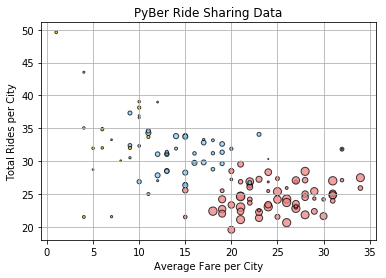

In [15]:
avgfare = mergedatafinal_df["Average Fare"]
totalrides = mergedatafinal_df["Total Rides"]
drivercount = mergedatafinal_df["driver_count"]
city_type = mergedatafinal_df["type"]

#Identify Urban cities and assign color Light Coral

urbancity = mergedatafinal_df.loc[mergedatafinal_df["type"]=="Urban"]
urbancity["Color"]="lightcoral"
urbancity = urbancity[["city", "Color"]]

#Identify Urban cities and assign color Light Sky Blue

suburbancity = mergedatafinal_df.loc[mergedatafinal_df["type"]=="Suburban"]
suburbancity["Color"]="lightskyblue"
suburbancity = suburbancity[["city", "Color"]]

#Identify Urban cities and assign color Gold

ruralcity = mergedatafinal_df.loc[mergedatafinal_df["type"]=="Rural"]
ruralcity["Color"]="gold"
ruralcity = ruralcity[["city", "Color"]]

#Concatinate the data files

temp1_df = pd.concat([urbancity, suburbancity, ruralcity])
temp1_df

mergedatafinalcolor = mergedatafinal_df
cityfinal_df = mergedatafinalcolor.merge(temp1_df, how="outer", on="city")
cityfinal_df.head()

colors = cityfinal_df["Color"]
city_type2 = cityfinal_df["type"]

#Plot scatter plot data

plt.scatter(totalrides, avgfare, marker="o", sizes=drivercount, 
            facecolor=colors, edgecolors="black", 
            alpha=0.75)
plt.title("PyBer Ride Sharing Data")
plt.ylabel("Total Rides per City")
plt.xlabel("Average Fare per City")
#plt.legend(handles=[city_type],
#         loc="best")
plt.grid()

#Save the file image
plt.savefig("PyberScatter.png")

#Show the plot
plt.show()


In [17]:
#Pie Charts by City type

#Total Fares by City

ride_data.head()

faretotalcity_df = ride_data.groupby("city").sum()
faretotalcityrev_df = faretotalcity_df.reset_index()
faretotalcityrev_df = faretotalcityrev_df[["city","fare"]]
faretotalcityrev_df = faretotalcityrev_df.rename(columns={"fare":"Total Fares"})
faretotalcityrev_df.head()

,city,Total Fares
0,Alvarezhaven,741.79
1,Alyssaberg,535.85
2,Anitamouth,335.84
3,Antoniomouth,519.75
4,Aprilchester,417.65


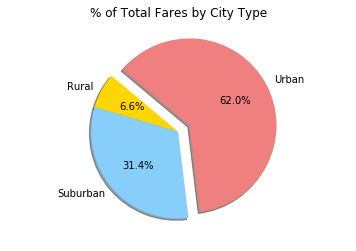

In [18]:
#Merge data with city_data

mergedatafinal2_df = mergedata_df.merge(faretotalcityrev_df, how="outer", on="city")
totalfares = mergedatafinal2_df["Total Fares"]
mergedatafinal2_df.head()

bycitytotalfares = mergedatafinal2_df.groupby("type").sum()
bycitytotalfaresrev = bycitytotalfares.reset_index()
bycitytotalfaresrev = bycitytotalfaresrev[["type", "Total Fares"]]
bycitytotalfaresrev

city_type = bycitytotalfaresrev["type"]
total_fares_type = bycitytotalfaresrev["Total Fares"]

#plot the pie charts
#plot the % of Total Fares by City Type

colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.15]
plt.axis("equal")

plt.pie(total_fares_type, labels=city_type, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")
plt.savefig("TotalFaresPie.png")
plt.show()

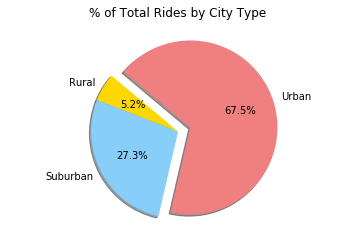

In [20]:
#plot the % of Total Rides by City Type

mergedatafinal_df.head()

bycitytotalrides = mergedatafinal_df.groupby("type").sum()
bycitytotalridesrev = bycitytotalrides.reset_index()
bycitytotalridesrev = bycitytotalridesrev[["type", "Total Rides"]]
bycitytotalridesrev

city_type_rides = bycitytotalridesrev["type"]
totalrides = bycitytotalridesrev["Total Rides"]

#plot the pie chart
#plot the % of Total Rides by City Type

colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.15]
plt.axis("equal")

plt.pie(totalrides, labels=city_type_rides, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.title("% of Total Rides by City Type")
plt.savefig("TotalRidesPie.png")
plt.show()

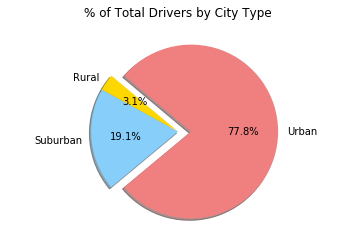

In [21]:
#plot the % of Total Rides by Total Drivers

mergedatafinal_df.head()

bycitytotaldriver = mergedatafinal_df.groupby("type").sum()
bycitytotaldriverrev = bycitytotaldriver.reset_index()
bycitytotaldriverrev = bycitytotaldriverrev[["type", "driver_count"]]
bycitytotaldriverrev

city_type_driver = bycitytotaldriverrev["type"]
totaldriver = bycitytotaldriverrev["driver_count"]

#plot the pie chart
#plot the % of Total Rides by City Type

colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0, 0, 0.15]
plt.axis("equal")

plt.pie(totaldriver, labels=city_type_driver, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type")
plt.savefig("TotalDriversPie.png")
plt.show()